In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset_train= pd.read_csv("/Users/soulaymanbarday/Downloads/archive/Google_Stock_Price_Train.csv")


In [3]:
dataset_train= pd.read_csv("/Users/soulaymanbarday/Downloads/archive/Google_Stock_Price_Train.csv")


In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set= dataset_train.iloc[:,1:2].values


In [6]:
from sklearn.preprocessing import MinMaxScaler


In [7]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60 : i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
print(X_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [10]:
print(y_train)


[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [11]:
print(X_train)


[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [12]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [13]:
print( len(X_train))

1198


In [14]:
print( len(X_train[0]))

60


In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [19]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressdor.fit(X_train, y_train, epochs=100, batch_size=32)

NameError: name 'regressor' is not defined

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add a final LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add a Dense layer for the output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 5s 58ms/step - loss: 0.0408
Epoch 2/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

In [25]:
dataset_test=pd.read_csv('/Users/soulaymanbarday/Downloads/archive/Google_Stock_Price_Test.csv')
actual_stock_price=dataset_test.iloc[:,1:2].values
dataset_total=pd.concat((dataset_train['Open'],  dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total) -len(dataset_test)-60:].values


inputs= inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])  # Assuming 'inputs' is your input data

    
X_test=np.array(X_test)

In [27]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape(-1, 1)  # Reshape to 2D
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


<function matplotlib.pyplot.legend(*args, **kwargs)>

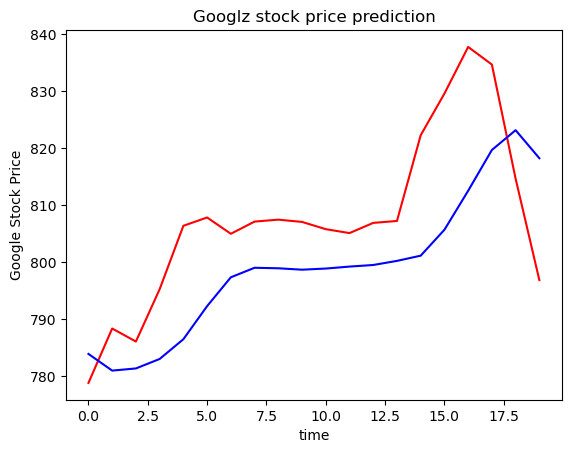

In [28]:
plt.plot(actual_stock_price , color='red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue' , label =" predicted")
plt.title('Googlz stock price prediction')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend